In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely import wkt
import numpy as np

In [2]:
grid=gpd.read_file('격자 데이터/grid.shp')
pop=gpd.read_file('최종 데이터/인구수/nlsp_021001001.shp')
building=gpd.read_file('최종 데이터/건축물/nlsp_021002021.shp')
price=gpd.read_file('최종 데이터/공시지가/nlsp_021004001.shp')
traffic=pd.read_csv('최종 데이터/교통혼잡도/교통혼잡도.csv')
parking=pd.read_csv('최종 데이터/주차장/주차장_변환_.csv')
illegal=pd.read_csv('최종 데이터/불법 주정차/불법주정차_변환_.csv')

In [3]:
grid=grid[['geometry']].reset_index()

In [4]:
pop=pop[['val', 'geometry']]
pop.fillna(0, inplace=True)

In [5]:
building=building[['val', 'geometry']]
building.fillna(0, inplace=True)

In [6]:
price=price[['val', 'geometry']]
price.fillna(0, inplace=True)

In [7]:
traffic=gpd.GeoDataFrame(traffic)
traffic=traffic[['읍면동명', '속도', 'geometry']]
traffic.columns=['행정동명', '교통 혼잡도', 'geometry']
traffic=gpd.GeoDataFrame(traffic)
traffic['geometry']=traffic['geometry'].apply(wkt.loads)
traffic.set_geometry('geometry', inplace=True)
traffic.set_crs(epsg=3857, inplace=True)

,행정동명,교통 혼잡도,geometry
0,금암1동,0.556634,"POLYGON ((14152503.620 4279041.263, 14152536.5..."
1,금암2동,0.614716,"POLYGON ((14153524.548 4280007.921, 14153575.2..."
2,노송동,0.650939,"POLYGON ((14154950.861 4277106.402, 14154952.3..."
3,덕진동,0.509125,"POLYGON ((14153879.094 4280973.877, 14153897.4..."
4,동서학동,0.395226,"POLYGON ((14157252.813 4274194.203, 14157279.6..."
5,삼천1동,0.654395,"POLYGON ((14152290.604 4273480.310, 14152317.3..."
6,삼천2동,0.686545,"POLYGON ((14152175.595 4272729.259, 14152184.6..."
7,삼천3동,0.452884,"POLYGON ((14147072.049 4274322.311, 14147131.1..."
8,서서학동,0.551970,"POLYGON ((14154247.714 4274619.809, 14154328.9..."
9,서신동,0.667040,"POLYGON ((14149590.421 4278688.550, 14149597.1..."


In [8]:
parking=parking[['주차구획수', 'geometry']]
parking=gpd.GeoDataFrame(parking)
parking['geometry']=parking['geometry'].apply(wkt.loads)
parking.set_geometry('geometry', inplace=True)
parking.set_crs(epsg=3857, inplace=True)

,주차구획수,geometry
0,70,POINT (14154782.096 4275113.334)
1,28,POINT (14149977.880 4277998.161)
2,131,POINT (14150315.846 4277473.365)
3,52,POINT (14149578.466 4275555.783)
4,60,POINT (14149561.212 4275392.694)
...,...,...
86,88,POINT (14155913.547 4278122.704)
87,69,POINT (14156322.312 4278292.288)
88,70,POINT (14156568.217 4277472.541)
89,73,POINT (14156829.484 4277464.578)


In [9]:
illegal=illegal[['count', 'geometry']]
illegal=gpd.GeoDataFrame(illegal)
illegal['geometry']=illegal['geometry'].apply(wkt.loads)
illegal.set_geometry('geometry', inplace=True)
illegal.set_crs(epsg=3857, inplace=True)

,count,geometry
0,3051,POINT (14152004.341 4279719.096)
1,3028,POINT (14153637.175 4276799.901)
2,2166,POINT (14148983.575 4275379.790)
3,2124,POINT (14153382.698 4275924.803)
4,2017,POINT (14151781.813 4283416.484)
...,...,...
95,418,POINT (14149159.126 4275197.072)
96,416,POINT (14153457.394 4276352.046)
97,416,POINT (14152875.861 4276377.171)
98,412,POINT (14148988.695 4275926.176)


In [10]:
print(type(grid))
print(type(pop))
print(type(building))
print(type(price))
print(type(traffic))
print(type(parking))
print(type(illegal))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [11]:
pop.to_crs(epsg=3857, inplace=True)
building.to_crs(epsg=3857, inplace=True)
price.to_crs(epsg=3857, inplace=True)

In [12]:
df=grid.copy()

In [13]:
df['인구수']=gpd.sjoin(grid, pop, how='left', op='intersects').groupby('index')['val'].max()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
df['건물수']=gpd.sjoin(grid, building, how='left', op='intersects').groupby('index')['val'].max()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [15]:
df['공시지가']=gpd.sjoin(grid, price, how='left', op='intersects').groupby('index')['val'].max()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [16]:
df['교통혼잡도']=gpd.sjoin(grid, traffic, how='left', op='intersects').groupby('index')['교통 혼잡도'].max()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [17]:
df['주차구획수']=gpd.sjoin(grid, parking, how='left', op='intersects').groupby('index')['주차구획수'].max()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [18]:
df['불법주정차']=gpd.sjoin(grid, illegal, how='left', op='intersects').groupby('index')['count'].max()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
df['행정동명']=gpd.sjoin(grid, traffic, how='left', op='intersects').groupby(['index', '행정동명', 'geometry'])['교통 혼잡도'].max().reset_index().drop_duplicates(subset=['index']).reset_index(drop=True)['행정동명']

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [20]:
gpd.sjoin(grid, traffic, how='left', op='intersects').groupby(['index', '행정동명', 'geometry'])['교통 혼잡도'].max().reset_index().drop_duplicates(subset=['index']).reset_index(drop=True)['행정동명'].unique()

c:\Users\horri\anaconda3\envs\dspp\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


array(['중화산2동', '중화산1동', '우아2동', '삼천1동', '삼천2동', '금암1동', '서신동', '인후3동',
       '노송동', '효자2동', '풍남동', '효자3동', '덕진동', '인후1동', '동서학동', '삼천3동', '중앙동',
       '완산동', '서서학동', '효자1동'], dtype=object)

In [21]:
traffic

,행정동명,교통 혼잡도,geometry
0,금암1동,0.556634,"POLYGON ((14152503.620 4279041.263, 14152536.5..."
1,금암2동,0.614716,"POLYGON ((14153524.548 4280007.921, 14153575.2..."
2,노송동,0.650939,"POLYGON ((14154950.861 4277106.402, 14154952.3..."
3,덕진동,0.509125,"POLYGON ((14153879.094 4280973.877, 14153897.4..."
4,동서학동,0.395226,"POLYGON ((14157252.813 4274194.203, 14157279.6..."
5,삼천1동,0.654395,"POLYGON ((14152290.604 4273480.310, 14152317.3..."
6,삼천2동,0.686545,"POLYGON ((14152175.595 4272729.259, 14152184.6..."
7,삼천3동,0.452884,"POLYGON ((14147072.049 4274322.311, 14147131.1..."
8,서서학동,0.551970,"POLYGON ((14154247.714 4274619.809, 14154328.9..."
9,서신동,0.667040,"POLYGON ((14149590.421 4278688.550, 14149597.1..."


In [22]:
new_df=df.groupby('행정동명')['교통혼잡도'].mean().reset_index()

In [23]:
new_df['인구수']=df.groupby('행정동명')['인구수'].mean().reset_index()['인구수']

In [24]:
new_df['건물수']=df.groupby('행정동명')['건물수'].mean().reset_index()['건물수']
new_df['공시지가']=df.groupby('행정동명')['공시지가'].mean().reset_index()['공시지가']

In [25]:
new_df['주차구획수']=df.groupby('행정동명')['주차구획수'].sum().reset_index()['주차구획수']
new_df['불법주정차']=df.groupby('행정동명')['불법주정차'].sum().reset_index()['불법주정차']

In [26]:
new_df.to_csv('ahp.csv', index=False)

In [27]:
import matplotlib.pyplot as plt

import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina' ## 그림 더 선명하게
from sklearn.preprocessing import MinMaxScaler

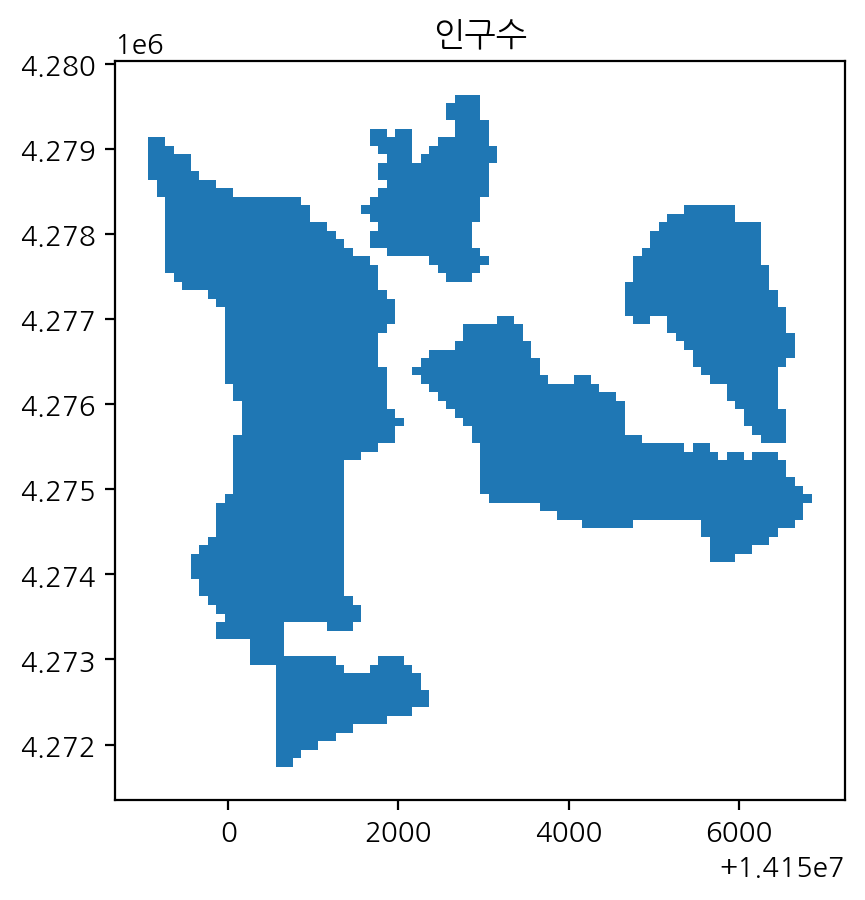

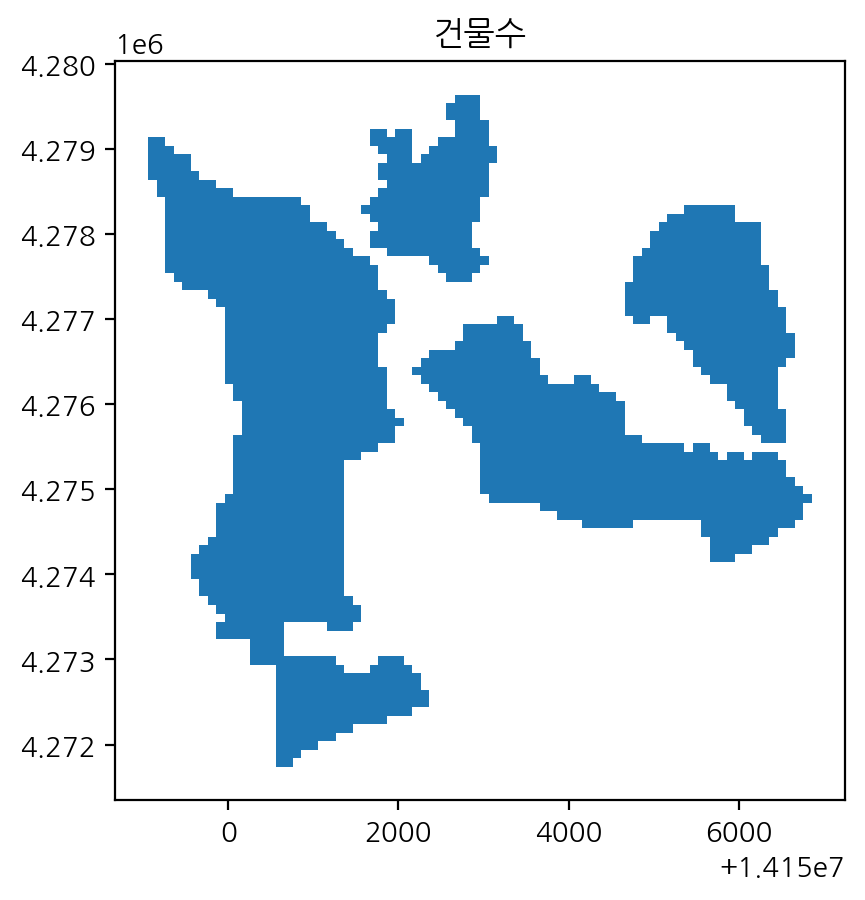

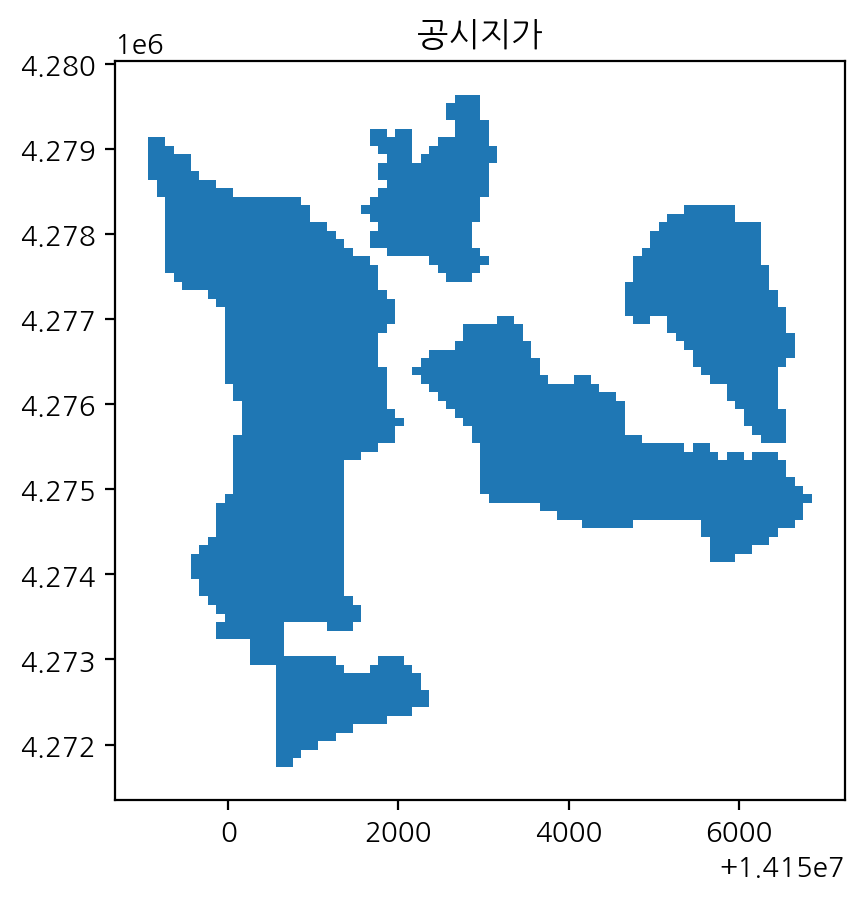

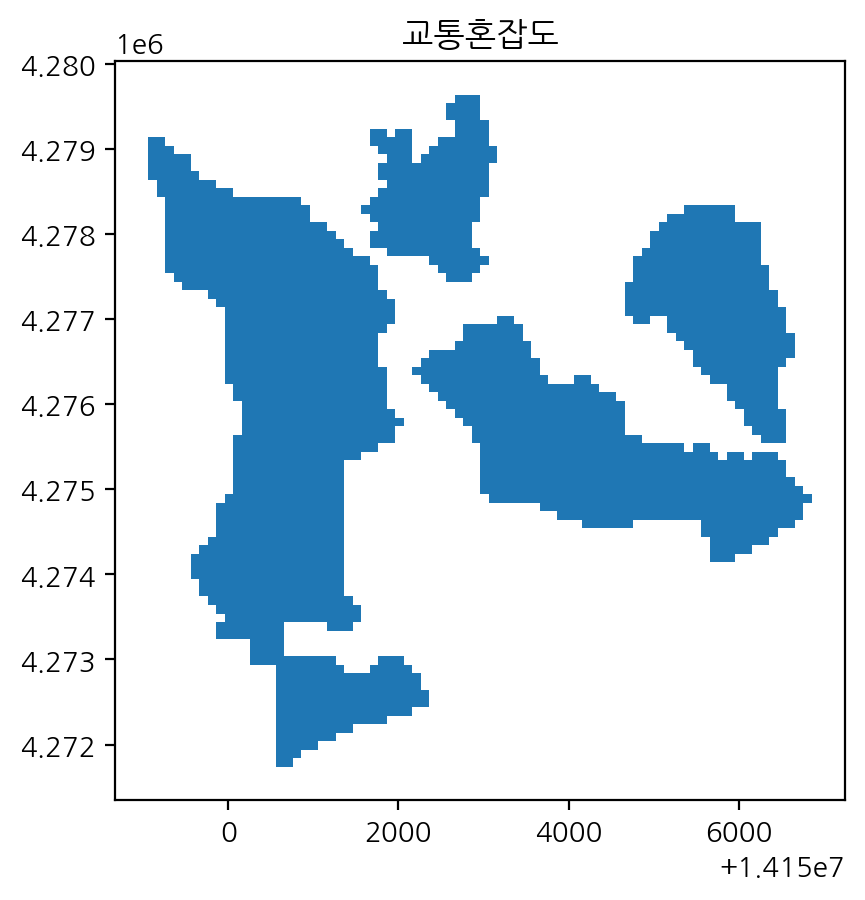

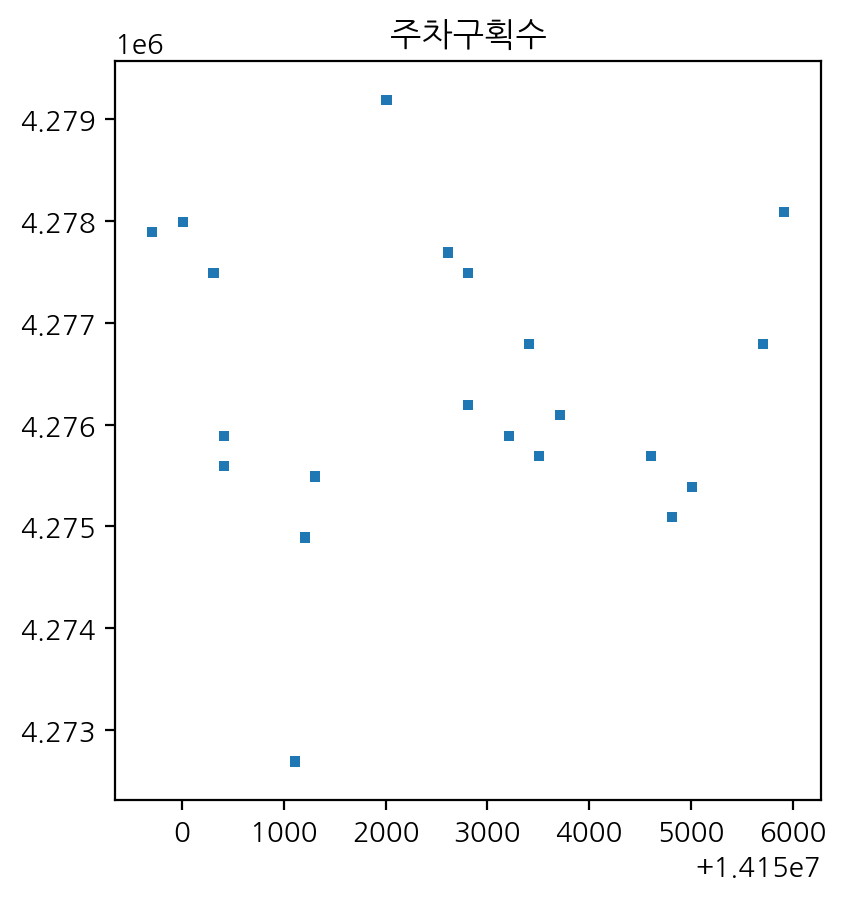

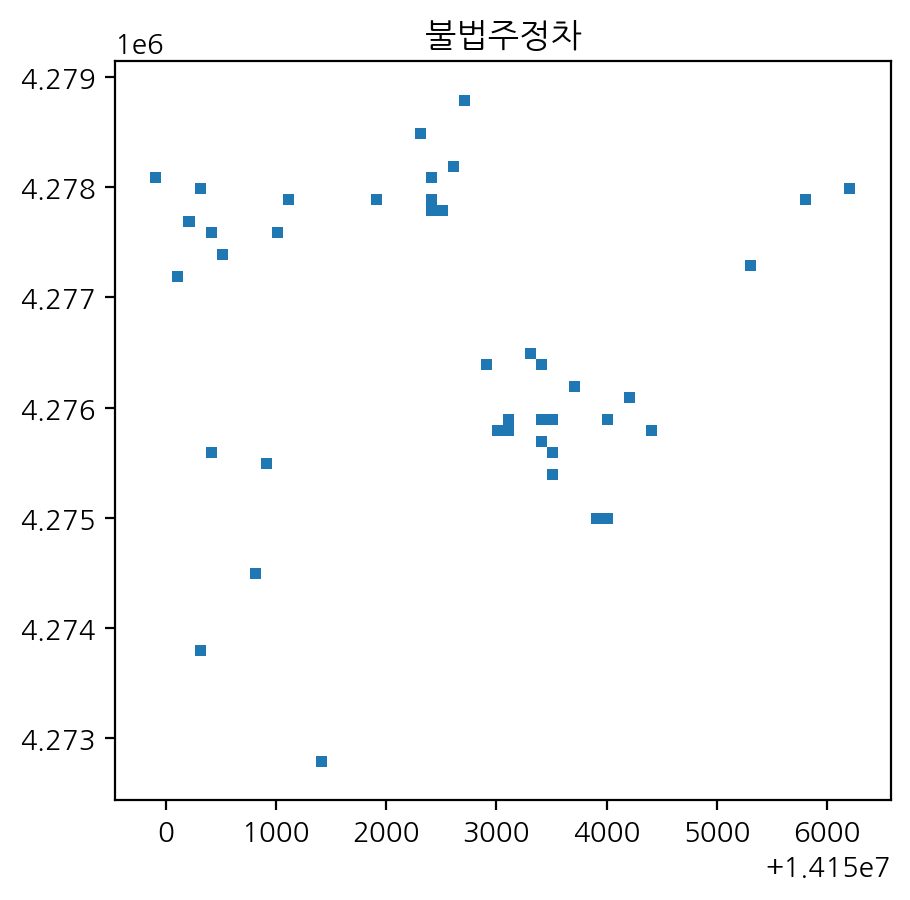

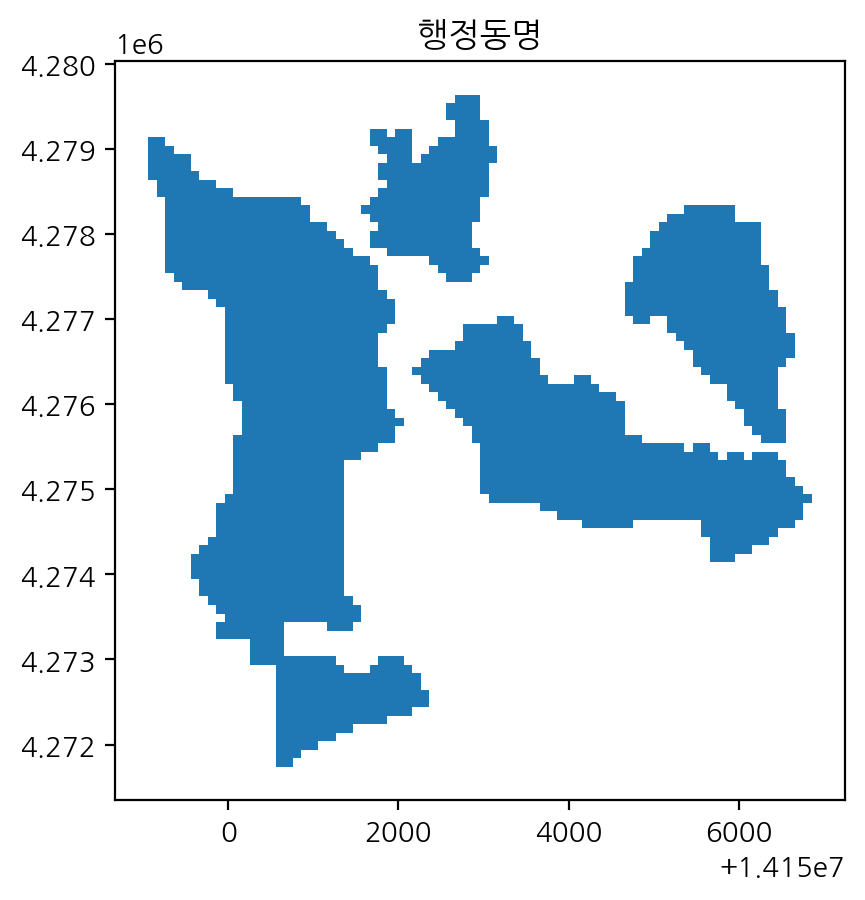

In [28]:
for col in df.columns[2:]:
    df[[col, 'geometry']].dropna().plot()
    plt.title(f'{col}')
    plt.show()

In [29]:
df.to_csv('격자.csv', index=False)

### MCLP

In [30]:
df=pd.read_csv('격자.csv')
df=gpd.GeoDataFrame(df)
df['geometry']=df['geometry'].apply(wkt.loads)
df=df.set_geometry('geometry')

In [31]:
df=df.set_crs(epsg=3857)
df=df.to_crs(epsg=4326)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 스케일링할 열 목록
columns_to_scale = ['교통혼잡도', '인구수', '건물수', '공시지가' , '불법주정차','주차구획수']

# 스케일링 진행
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [33]:
df['value']=df['교통혼잡도']*0.35+df['인구수']*0.137+df['건물수']*0.191+df['공시지가']*0.136+df['불법주정차'].fillna(0)*0.185

In [34]:
df

,index,geometry,인구수,건물수,공시지가,교통혼잡도,주차구획수,불법주정차,행정동명,value
0,0,"POLYGON ((127.12473 35.81897, 127.12563 35.818...",0.411206,0.202703,0.099303,0.644488,NaN,NaN,중화산2동,0.334128
1,1,"POLYGON ((127.12473 35.81824, 127.12563 35.818...",0.528015,0.297297,0.144008,0.644488,NaN,NaN,중화산2동,0.374278
2,2,"POLYGON ((127.12473 35.81751, 127.12563 35.817...",0.528015,0.297297,0.230561,0.644488,NaN,NaN,중화산1동,0.386049
3,3,"POLYGON ((127.12473 35.81678, 127.12563 35.816...",0.098765,0.229730,0.281730,0.644488,NaN,NaN,중화산1동,0.321295
4,4,"POLYGON ((127.12563 35.81824, 127.12653 35.818...",0.528015,0.229730,0.134877,0.644488,NaN,NaN,중화산2동,0.360131
...,...,...,...,...,...,...,...,...,...,...
2198,2198,"POLYGON ((127.12473 35.81970, 127.12563 35.819...",0.000000,0.202703,0.094857,0.644488,NaN,NaN,중화산2동,0.277188
2199,2199,"POLYGON ((127.12473 35.82480, 127.12563 35.824...",0.035138,0.135135,0.168214,0.644488,NaN,NaN,중화산2동,0.279073
2200,2200,"POLYGON ((127.12473 35.82407, 127.12563 35.824...",0.026591,0.135135,0.168214,0.644488,NaN,NaN,중화산2동,0.277902
2201,2201,"POLYGON ((127.12473 35.82334, 127.12563 35.823...",0.110161,0.189189,0.168214,0.644488,NaN,NaN,중화산2동,0.299675


In [35]:
df.to_csv('value.csv', index=False)

In [36]:
facility_df=df[df['주차구획수'].isna()].reset_index(drop=True)
top_criterion = np.quantile(facility_df['value'],0.75)
print(np.quantile(facility_df['value'],0.75))
demand_df = facility_df.query('value > @top_criterion').reset_index(drop=True)

0.3135579009607047


In [37]:
f_centroid = facility_df['geometry'].centroid   # 후보입지 격자의 중심좌표
d_centroid = demand_df['geometry'].centroid     # 수요입지 격자의 중심좌표

C:\Users\horri\AppData\Local\Temp\ipykernel_28864\2593155790.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  f_centroid = facility_df['geometry'].centroid   # 후보입지 격자의 중심좌표
C:\Users\horri\AppData\Local\Temp\ipykernel_28864\2593155790.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  d_centroid = demand_df['geometry'].centroid     # 수요입지 격자의 중심좌표


In [38]:
from shapely.geometry import Point

# 중심좌표 및 중심좌표 주위 8개의 점을 생성하기 위한 연산 리스트
add_list = [[0,0]]

# 수요격자의 중심좌표 포함 9개 좌표 생성
def add_demand(x,y,weight):  # weight : 해당 격자의 범죄위험지수
    temp_list=[]
    
    for add in add_list:
        new_x, new_y = x+add[0] ,y+add[1]
        temp_list.append((new_x, new_y,weight))
    return temp_list

# 후보격자의 중심좌표 포함 9개 좌표 생성
def add_facility(x,y):
    temp_list=[]
    
    for add in add_list:
        new_x, new_y = x+add[0] ,y+add[1]
        temp_list.append((new_x, new_y))
    return temp_list


In [39]:
## 수요격자 내 일정 간격의 좌표 생성
demand_points = []

for index in range(len(demand_df)): 
    weight = demand_df['value'][index]
    y,x = d_centroid[index].coords.xy      # 수요격자의 중심좌표
    
    # 중심좌표 포함 9개 좌표 생성
    demand_points += add_demand(x[0],y[0],weight)            
    

In [40]:
## 후보격자 내 일정 간격의 좌표 생성
facility_points = []

for index in range(len(facility_df)): 
    y,x = f_centroid[index].coords.xy      # 후보격자의 중심좌표
    # 중심좌표 포함 9개 좌표 생성
    facility_points += add_facility(x[0],y[0])    
    

In [41]:
print(len(demand_df)*9 , len(demand_points))
print(len(facility_df)*9 , len(facility_points))

4914 546
19638 2182


In [42]:
grid_points = []   # 격자의 외곽 좌표 리스트

# 격자의 외곽 좌표를 후보지점에 추가
for index in range(len(facility_df)):
    
    polygon = facility_df['geometry'][index]
    polygon_points = list(polygon.exterior.coords)
    polygon_points2 = [(lat, lon) for lon, lat in polygon_points]
    grid_points += polygon_points2

unique_grid_points = list(set(grid_points))
print(len(unique_grid_points))

2521


In [43]:
# 최종 후보좌표  : 후보격자 내부 좌표 9곳 + 외곽 좌표 4곳 (중복 제외)
final_facility_points = facility_points + unique_grid_points

In [44]:
import pandas as pd
exclusion_df=pd.read_csv('최종 데이터/주차장/주차장_변환_.csv')

In [45]:
exclusion_df=exclusion_df[['latitude', 'longitude']]
exclusion_df.columns=['위도', '경도']

In [46]:
exclusion_points = []

for index in range(len(exclusion_df)):
    x,y = exclusion_df['위도'][index] ,exclusion_df['경도'][index]
    exclusion_points.append((x,y))

# MCLP 모델링 

In [47]:
import pulp
from geopy.distance import geodesic

final_cctv_index = []
covered_info = []

cover_radius = 0.1  # km 단위, 50m
exclusion_radius = 0.1 # km 단위, 50m
max_facilities = 5  # 최대 설치 가능한 주차장 수


# 모델 설정
model = pulp.LpProblem("MCLP", pulp.LpMaximize)

# 변수
x = pulp.LpVariable.dicts("x", range(len(facility_points)), cat='Binary')  # 각 설비의 설치 여부
y = pulp.LpVariable.dicts("y", ((i, j) for i in range(len(demand_points)) for j in range(len(facility_points))), cat='Binary')  # 수요 지점 i가 설비 j에 의해 서비스되는지 여부

# 목적 함수
model += pulp.lpSum(demand_points[i][2] * y[i, j] for i, j in y)  # 가중치를 반영한 커버 최대화

# 제약 조건
# 설치할 수 있는 주차장의 총 수를 제한
model += pulp.lpSum(x[j] for j in range(len(facility_points))) == max_facilities

# 특정 지역 반경 내의 후보 지점 제외
for i, facility in enumerate(facility_points):
    for j, exclusion_center in enumerate(exclusion_points):
        if geodesic(exclusion_center, facility).km <= exclusion_radius:
            model += x[i] == 0  # 제외 범위 내의 설비는 설치 불가

for i, demand in enumerate(demand_points):
    for j, facility in enumerate(facility_points):
        # 수요 지점과 설비 사이의 거리가 서비스 범위 내인지 확인
        if geodesic(demand[:2], facility).km <= cover_radius:
            model += y[i, j] <= x[j]  # 수요 지점 i가 설비 j에 의해 서비스되려면 설비 j가 설치되어야 함
        else:
            model += y[i, j] == 0  # 거리가 너무 멀면 서비스 불가능

# 각 수요 지점은 하나의 설비에 의해서만 서비스될 수 있음
for i in range(len(demand_points)):
    model += pulp.lpSum(y[i, j] for j in range(len(facility_points))) <= 1

# 문제 해결
model.solve()

# 결과 출력
print("Selected Facilities and their Coordinates:")
for j in range(len(facility_points)):
    if pulp.value(x[j]) == 1:
        final_cctv_index.append(j)
        print(f"Facility {j} is selected at coordinates {facility_points[j]}.")

print("Coverage and Weights:")
for i, j in y:
    if pulp.value(y[i, j]) == 1:
        covered_info.append((i,j))
        print(f"Demand point {i} with weight {demand_points[i][2]} is covered by facility {j}.")

Selected Facilities and their Coordinates:
Facility 987 is selected at coordinates (35.818603887260046, 127.14494162793459).
Facility 992 is selected at coordinates (35.820060714622564, 127.1458399432187).
Facility 1075 is selected at coordinates (35.82151751525038, 127.13865342094573).
Facility 1168 is selected at coordinates (35.82443103630007, 127.14224668208222).
Facility 1198 is selected at coordinates (35.820060714622564, 127.14314499736633).
Coverage and Weights:
Demand point 199 with weight 0.5153265930350125 is covered by facility 1075.
Demand point 218 with weight 0.5003444308169283 is covered by facility 1198.
Demand point 220 with weight 0.5334945206339105 is covered by facility 987.
Demand point 234 with weight 0.5822747980472824 is covered by facility 992.
Demand point 235 with weight 0.5808436489494667 is covered by facility 987.
Demand point 236 with weight 0.5808436489494667 is covered by facility 987.
Demand point 237 with weight 0.5671137438883105 is covered by facil

In [48]:
from shapely.geometry import Point
import geopandas as gpd

index = list(range(len(final_cctv_index)))
index_df = pd.DataFrame(index,columns=['new_cctv_id'])

result =[]

for index in final_cctv_index:
    y, x = facility_points[index]
    result.append(Point(x,y))

result_df = gpd.GeoDataFrame(index_df, geometry=result)
result_df

,new_cctv_id,geometry
0,0,POINT (127.14494 35.81860)
1,1,POINT (127.14584 35.82006)
2,2,POINT (127.13865 35.82152)
3,3,POINT (127.14225 35.82443)
4,4,POINT (127.14314 35.82006)


<Axes: >

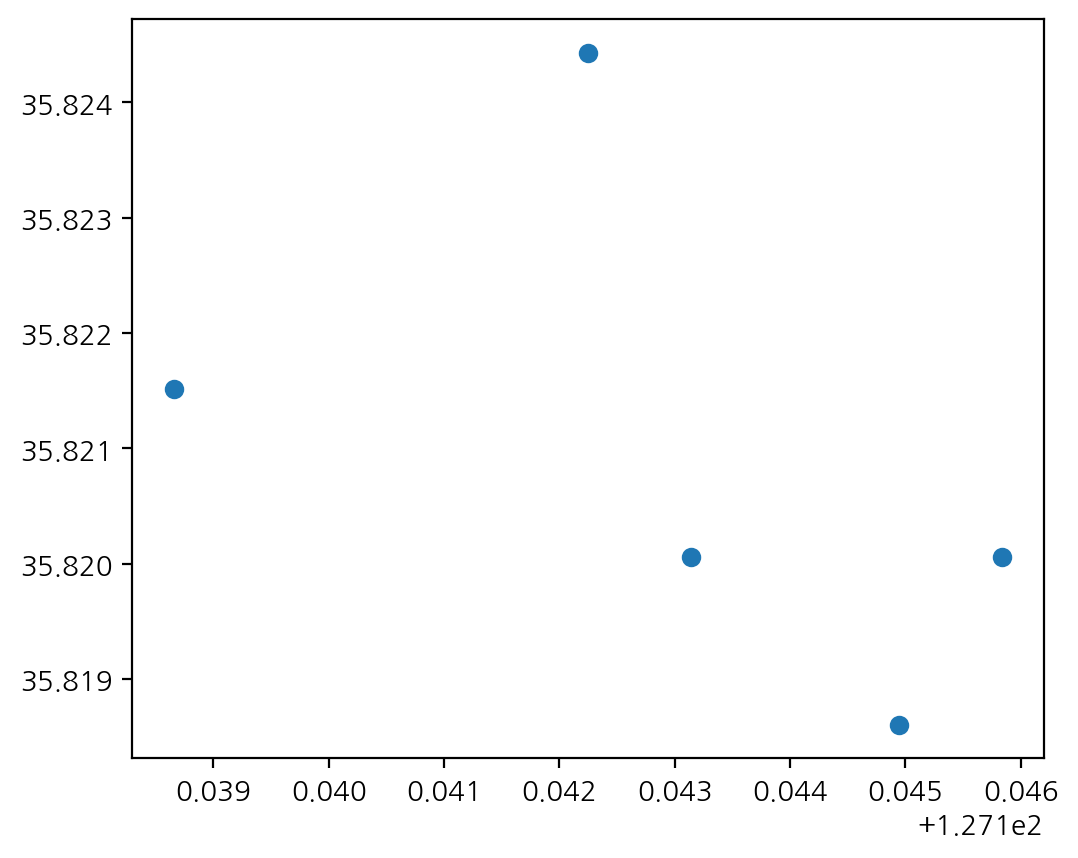

In [49]:
result_df.plot()